# pyhf usage in Top FC 

Expected upper limits on signal strength using pyhf. There are three types of signals in these plots:

* Scalar like
* Vector like
* Tensor like

## Functions for ttbar signal to draw UL plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import array
import ast

def array_to_list(CL, N_sig, xsec):
    #ttbar_xsec = 13 * (10**-15)
    ttbar_xsec = xsec
    lumi = 3 * (10**18)

    CL = CL.replace('array', '')
    CL = CL.replace('(', '')
    CL = CL.replace(')', '')    
    CL = ast.literal_eval(CL)

    Lambda = [((ttbar_xsec * lumi) / (N_sig * mu))**(1/4) for mu in CL]   
    print(Lambda) 
    return Lambda

def UL_plots(xsec, NN_low, NN_med, NN_high, n_sig_low, n_sig_med, n_sig_high, x_title, weight_low, weight_med, weight_high, model, y_lim):

    # Convert strings to lists
    NN_low = array_to_list(NN_low, n_sig_low, xsec)
    NN_med = array_to_list(NN_med, n_sig_med, xsec)
    NN_high = array_to_list(NN_high, n_sig_high, xsec)

    # Generate some example data (x values)
    x_values_low = np.linspace(1, 3, 2)
    x_values_med = np.linspace(3.5, 5.5, 2)
    x_values_high = np.linspace(6, 8, 2)

    def scalar(list1, list2):
        final_list = []        
        val = 1
        for i in range(len(list1)):
            final_list.append(list2[i] + (list1[i] - list2[i]) * val)
        return final_list

    # Calculate upper and lower limits for a 95% confidence level
    NN_low_med = [NN_low[2],NN_low[2]]
    lower_NN_low1 = [NN_low[1],NN_low[1]]; lower_NN_low1 = scalar(lower_NN_low1, NN_low_med)
    upper_NN_low1 = [NN_low[3],NN_low[3]]; upper_NN_low1 = scalar(upper_NN_low1, NN_low_med)
    lower_NN_low2 = [NN_low[0],NN_low[0]]; lower_NN_low2 = scalar(lower_NN_low2, NN_low_med)
    upper_NN_low2 = [NN_low[4],NN_low[4]]; upper_NN_low2 = scalar(upper_NN_low2, NN_low_med)

    NN_med_med = [NN_med[2],NN_med[2]]
    lower_NN_med1 = [NN_med[1],NN_med[1]]; lower_NN_med1 = scalar(lower_NN_med1, NN_low_med)
    upper_NN_med1 = [NN_med[3],NN_med[3]]; upper_NN_med1 = scalar(upper_NN_med1, NN_low_med)
    lower_NN_med2 = [NN_med[0],NN_med[0]]; lower_NN_med2 = scalar(lower_NN_med2, NN_low_med)
    upper_NN_med2 = [NN_med[4],NN_med[4]]; upper_NN_med2 = scalar(upper_NN_med2, NN_low_med)

    NN_high_med = [NN_high[2],NN_high[2]]
    lower_NN_high1 = [NN_high[1],NN_high[1]]; lower_NN_high1 = scalar(lower_NN_high1, NN_low_med)
    upper_NN_high1 = [NN_high[3],NN_high[3]]; upper_NN_high1 = scalar(upper_NN_high1, NN_low_med)
    lower_NN_high2 = [NN_high[0],NN_high[0]]; lower_NN_high2 = scalar(lower_NN_high2, NN_low_med)
    upper_NN_high2 = [NN_high[4],NN_high[4]]; upper_NN_high2 = scalar(upper_NN_high2, NN_low_med)


    # Create the plot for low NN_weight
    plt.figure(figsize=(8, 6), dpi=100)
    plt.plot(x_values_low, NN_low_med, label='Expected Limits', color='black', linewidth=1)
    plt.plot(x_values_low, lower_NN_low1, color='lime')
    plt.plot(x_values_low, lower_NN_low2, color='yellow')
    plt.plot(x_values_low, upper_NN_low1, color='lime')
    plt.plot(x_values_low, upper_NN_low2, color='yellow')

    plt.fill_between(x_values_low, NN_low_med, lower_NN_low1, color='lime', label='$\pm$1$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, NN_low_med, upper_NN_low1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_low, lower_NN_low1, lower_NN_low2, color='yellow', label='$\pm$2$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, upper_NN_low1, upper_NN_low2, color='yellow')  # Fill area between curves

    # Create the plot for med NN_weight
    plt.plot(x_values_med, NN_med_med, color='black', linewidth=1)
    plt.plot(x_values_med, lower_NN_med1, color='lime')
    plt.plot(x_values_med, lower_NN_med2, color='yellow')
    plt.plot(x_values_med, upper_NN_med1, color='lime')
    plt.plot(x_values_med, upper_NN_med2, color='yellow')

    plt.fill_between(x_values_med, NN_med_med, lower_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, NN_med_med, upper_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, lower_NN_med1, lower_NN_med2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_med, upper_NN_med1, upper_NN_med2, color='yellow')  # Fill area between curves

    # Create the plot for low NN_weight
    plt.plot(x_values_high, NN_high_med, color='black', linewidth=1)
    plt.plot(x_values_high, lower_NN_high1, color='lime')
    plt.plot(x_values_high, lower_NN_high2, color='yellow')
    plt.plot(x_values_high, upper_NN_high1, color='lime')
    plt.plot(x_values_high, upper_NN_high2, color='yellow')

    plt.fill_between(x_values_high, NN_high_med, lower_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, NN_high_med, upper_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, lower_NN_high1, lower_NN_high2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_high, upper_NN_high1, upper_NN_high2, color='yellow')  # Fill area between curves


    # Add labels and title
    plt.xticks([])
    #plt.xlabel(x_title)
    #plt.ylabel('Signal strength ($\mu$)')
    plt.ylabel('Expected $\Lambda_{min}$ (TeV)')
    plt.ylim(y_lim)
    plt.title('95% CL Upper limits for {} signal\n{}'.format(x_title, model))
    plt.legend()

    # Customize x-axis ticks and labels
    x_ticks = [2, 4.5, 7]  # Specify the tick locations
    #x_tick_labels = ['SRR', 'VRR', 'TRR']  # Specify the tick labels
    x_tick_labels = [weight_low, weight_med, weight_high]  # Specify the tick labels
    plt.xticks(x_ticks, x_tick_labels)  # Apply custom ticks and labels
    '''
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\mathrm{median}=%.2f$' % (median, ),
        r'$\sigma=%.2f$' % (sigma, )))
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    '''
    y_lim_text = y_lim[1] - 0.4
    count=0
    plt.text(1, y_lim_text, r'$\bf{\sqrt{s}=13 TeV, L=3000 fb^{-1}}$'); count +=1
    if x_title == 'ttbar_charm':
        plt.text(1, y_lim_text-count*0.3 , r'$pp \rightarrow t+l^{+}l^{-}c$') 
    if x_title == 'ttbar_up':
        plt.text(1, y_lim_text-count*0.3 , r'$pp \rightarrow t+l^{+}l^{-}u$')
    if x_title == 'tW_up':
        plt.text(1, y_lim_text-count*0.3 , r'$pp \rightarrow W+l^{+}l^{-}u$')             
    count +=1;
    plt.text(1, y_lim_text-count*0.3, 'V$_{RR}$=T$_{RR}$=S$_{RR}$=1') 
    count +=1;
    plt.text(1, y_lim_text-count*0.3, 'Limits at 95% CL') 
    
    # Show the plot
    #plt.grid(True)
    #plt.minorticks_on()  # Turn on minor ticks
    plt.grid(which='both', linestyle='--', linewidth=0.7)

    plt.show()


def UL_all_plots(NN_low, NN_med, NN_high, n_sig_low, n_sig_med, n_sig_high, x_sec_low, x_sec_med, x_sec_high, x_title, weight_low, weight_med, weight_high, model, y_lim):

    # Convert strings to lists
    NN_low = array_to_list(NN_low, n_sig_low, x_sec_low)
    NN_med = array_to_list(NN_med, n_sig_med, x_sec_med)
    NN_high = array_to_list(NN_high, n_sig_high, x_sec_high)

    # Generate some example data (x values)
    x_values_low = np.linspace(1, 3, 2)
    x_values_med = np.linspace(3.5, 5.5, 2)
    x_values_high = np.linspace(6, 8, 2)


    # Calculate upper and lower limits for a 95% confidence level
    NN_low_med = [NN_low[2],NN_low[2]]
    lower_NN_low1 = [NN_low[1],NN_low[1]]
    upper_NN_low1 = [NN_low[3],NN_low[3]]
    lower_NN_low2 = [NN_low[0],NN_low[0]]
    upper_NN_low2 = [NN_low[4],NN_low[4]]

    NN_med_med = [NN_med[2],NN_med[2]]
    lower_NN_med1 = [NN_med[1],NN_med[1]]
    upper_NN_med1 = [NN_med[3],NN_med[3]]
    lower_NN_med2 = [NN_med[0],NN_med[0]]
    upper_NN_med2 = [NN_med[4],NN_med[4]]

    NN_high_med = [NN_high[2],NN_high[2]]
    lower_NN_high1 = [NN_high[1],NN_high[1]]
    upper_NN_high1 = [NN_high[3],NN_high[3]]
    lower_NN_high2 = [NN_high[0],NN_high[0]]
    upper_NN_high2 = [NN_high[4],NN_high[4]]    


    # Create the plot for low NN_weight
    plt.figure(figsize=(8, 6), dpi=100)
    plt.plot(x_values_low, NN_low_med, label='Expected Limits', color='black', linewidth=1)
    plt.plot(x_values_low, lower_NN_low1, color='lime')
    plt.plot(x_values_low, lower_NN_low2, color='yellow')
    plt.plot(x_values_low, upper_NN_low1, color='lime')
    plt.plot(x_values_low, upper_NN_low2, color='yellow')

    plt.fill_between(x_values_low, NN_low_med, lower_NN_low1, color='lime', label='$\pm$1$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, NN_low_med, upper_NN_low1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_low, lower_NN_low1, lower_NN_low2, color='yellow', label='$\pm$2$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, upper_NN_low1, upper_NN_low2, color='yellow')  # Fill area between curves

    # Create the plot for med NN_weight
    plt.plot(x_values_med, NN_med_med, color='black', linewidth=1)
    plt.plot(x_values_med, lower_NN_med1, color='lime')
    plt.plot(x_values_med, lower_NN_med2, color='yellow')
    plt.plot(x_values_med, upper_NN_med1, color='lime')
    plt.plot(x_values_med, upper_NN_med2, color='yellow')

    plt.fill_between(x_values_med, NN_med_med, lower_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, NN_med_med, upper_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, lower_NN_med1, lower_NN_med2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_med, upper_NN_med1, upper_NN_med2, color='yellow')  # Fill area between curves

    # Create the plot for low NN_weight
    plt.plot(x_values_high, NN_high_med, color='black', linewidth=1)
    plt.plot(x_values_high, lower_NN_high1, color='lime')
    plt.plot(x_values_high, lower_NN_high2, color='yellow')
    plt.plot(x_values_high, upper_NN_high1, color='lime')
    plt.plot(x_values_high, upper_NN_high2, color='yellow')

    plt.fill_between(x_values_high, NN_high_med, lower_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, NN_high_med, upper_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, lower_NN_high1, lower_NN_high2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_high, upper_NN_high1, upper_NN_high2, color='yellow')  # Fill area between curves


    # Add labels and title
    plt.xticks([])
    #plt.xlabel(x_title)
    plt.ylim(y_lim)
    plt.ylabel('Expected $\Lambda_{min}$ (TeV)', fontsize=13)    
    plt.title('95% CL Upper limits for {} signal\n{}'.format(x_title, model))
    plt.legend()

    # Customize x-axis ticks and labels
    x_ticks = [2, 4.5, 7]  # Specify the tick locations
    #x_tick_labels = ['SRR', 'VRR', 'TRR']  # Specify the tick labels
    x_tick_labels = [weight_low, weight_med, weight_high]  # Specify the tick labels
    plt.xticks(x_ticks, x_tick_labels, fontsize=15)  # Apply custom ticks and labels
    '''
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\mathrm{median}=%.2f$' % (median, ),
        r'$\sigma=%.2f$' % (sigma, )))
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    '''
    y_lim_text = y_lim[1] - 0.6
    count=0
    plt.text(1, y_lim_text, r'$\bf{\sqrt{s}=13 TeV, L=3000 fb^{-1}}$', fontsize=13); count +=1
    if x_title == 'ttbar_charm':
        plt.text(1, y_lim_text-count*0.5 , r'$pp \rightarrow t+l^{+}l^{-}c$', fontsize=15) 
    if x_title == 'ttbar_up':
        plt.text(1, y_lim_text-count*0.5 , r'$pp \rightarrow t+l^{+}l^{-}u$', fontsize=15)
    if x_title == 'tW_up':
        plt.text(1, y_lim_text-count*0.5 , r'$pp \rightarrow W+l^{+}l^{-}u$', fontsize=15)                 
    count +=1;
    plt.text(1, y_lim_text-count*0.5, 'Limits at 95% CL', fontsize=15) 
    
    # Show the plot
    #plt.grid(True)
    #plt.minorticks_on()  # Turn on minor ticks
    plt.grid(which='both', linestyle='--', linewidth=0.7)

    plt.show()

def UL_plots(xsec, NN_low, NN_med, NN_high, n_sig_low, n_sig_med, n_sig_high, x_title, weight_low, weight_med, weight_high, model, y_lim):

    # Convert strings to lists
    NN_low = array_to_list(NN_low, n_sig_low, xsec)
    NN_med = array_to_list(NN_med, n_sig_med, xsec)
    NN_high = array_to_list(NN_high, n_sig_high, xsec)

    # Generate some example data (x values)
    x_values_low = np.linspace(1, 3, 2)
    x_values_med = np.linspace(3.5, 5.5, 2)
    x_values_high = np.linspace(6, 8, 2)

    def scalar(list1, list2):
        final_list = []        
        val = 1
        for i in range(len(list1)):
            final_list.append(list2[i] + (list1[i] - list2[i]) * val)
        return final_list

    # Calculate upper and lower limits for a 95% confidence level
    NN_low_med = [NN_low[2],NN_low[2]]
    lower_NN_low1 = [NN_low[1],NN_low[1]]; lower_NN_low1 = scalar(lower_NN_low1, NN_low_med)
    upper_NN_low1 = [NN_low[3],NN_low[3]]; upper_NN_low1 = scalar(upper_NN_low1, NN_low_med)
    lower_NN_low2 = [NN_low[0],NN_low[0]]; lower_NN_low2 = scalar(lower_NN_low2, NN_low_med)
    upper_NN_low2 = [NN_low[4],NN_low[4]]; upper_NN_low2 = scalar(upper_NN_low2, NN_low_med)

    NN_med_med = [NN_med[2],NN_med[2]]
    lower_NN_med1 = [NN_med[1],NN_med[1]]; lower_NN_med1 = scalar(lower_NN_med1, NN_low_med)
    upper_NN_med1 = [NN_med[3],NN_med[3]]; upper_NN_med1 = scalar(upper_NN_med1, NN_low_med)
    lower_NN_med2 = [NN_med[0],NN_med[0]]; lower_NN_med2 = scalar(lower_NN_med2, NN_low_med)
    upper_NN_med2 = [NN_med[4],NN_med[4]]; upper_NN_med2 = scalar(upper_NN_med2, NN_low_med)

    NN_high_med = [NN_high[2],NN_high[2]]
    lower_NN_high1 = [NN_high[1],NN_high[1]]; lower_NN_high1 = scalar(lower_NN_high1, NN_low_med)
    upper_NN_high1 = [NN_high[3],NN_high[3]]; upper_NN_high1 = scalar(upper_NN_high1, NN_low_med)
    lower_NN_high2 = [NN_high[0],NN_high[0]]; lower_NN_high2 = scalar(lower_NN_high2, NN_low_med)
    upper_NN_high2 = [NN_high[4],NN_high[4]]; upper_NN_high2 = scalar(upper_NN_high2, NN_low_med)


    # Create the plot for low NN_weight
    plt.figure(figsize=(8, 6), dpi=100)
    plt.plot(x_values_low, NN_low_med, label='Expected Limits', color='black', linewidth=1)
    plt.plot(x_values_low, lower_NN_low1, color='lime')
    plt.plot(x_values_low, lower_NN_low2, color='yellow')
    plt.plot(x_values_low, upper_NN_low1, color='lime')
    plt.plot(x_values_low, upper_NN_low2, color='yellow')

    plt.fill_between(x_values_low, NN_low_med, lower_NN_low1, color='lime', label='$\pm$1$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, NN_low_med, upper_NN_low1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_low, lower_NN_low1, lower_NN_low2, color='yellow', label='$\pm$2$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, upper_NN_low1, upper_NN_low2, color='yellow')  # Fill area between curves

    # Create the plot for med NN_weight
    plt.plot(x_values_med, NN_med_med, color='black', linewidth=1)
    plt.plot(x_values_med, lower_NN_med1, color='lime')
    plt.plot(x_values_med, lower_NN_med2, color='yellow')
    plt.plot(x_values_med, upper_NN_med1, color='lime')
    plt.plot(x_values_med, upper_NN_med2, color='yellow')

    plt.fill_between(x_values_med, NN_med_med, lower_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, NN_med_med, upper_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, lower_NN_med1, lower_NN_med2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_med, upper_NN_med1, upper_NN_med2, color='yellow')  # Fill area between curves

    # Create the plot for low NN_weight
    plt.plot(x_values_high, NN_high_med, color='black', linewidth=1)
    plt.plot(x_values_high, lower_NN_high1, color='lime')
    plt.plot(x_values_high, lower_NN_high2, color='yellow')
    plt.plot(x_values_high, upper_NN_high1, color='lime')
    plt.plot(x_values_high, upper_NN_high2, color='yellow')

    plt.fill_between(x_values_high, NN_high_med, lower_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, NN_high_med, upper_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, lower_NN_high1, lower_NN_high2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_high, upper_NN_high1, upper_NN_high2, color='yellow')  # Fill area between curves


    # Add labels and title
    plt.xticks([])
    #plt.xlabel(x_title)
    #plt.ylabel('Signal strength ($\mu$)')
    plt.ylabel('Expected $\Lambda_{min}$ (TeV)')
    plt.ylim(y_lim)
    plt.title('95% CL Upper limits for {} signal\n{}'.format(x_title, model))
    plt.legend()

    # Customize x-axis ticks and labels
    x_ticks = [2, 4.5, 7]  # Specify the tick locations
    #x_tick_labels = ['SRR', 'VRR', 'TRR']  # Specify the tick labels
    x_tick_labels = [weight_low, weight_med, weight_high]  # Specify the tick labels
    plt.xticks(x_ticks, x_tick_labels)  # Apply custom ticks and labels
    '''
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\mathrm{median}=%.2f$' % (median, ),
        r'$\sigma=%.2f$' % (sigma, )))
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    '''
    y_lim_text = y_lim[1] - 0.4
    count=0
    plt.text(1, y_lim_text, r'$\bf{\sqrt{s}=13 TeV, L=3000 fb^{-1}}$'); count +=1
    if x_title == 'ttbar_charm':
        plt.text(1, y_lim_text-count*0.3 , r'$pp \rightarrow t+l^{+}l^{-}c$') 
    if x_title == 'ttbar_up':
        plt.text(1, y_lim_text-count*0.3 , r'$pp \rightarrow t+l^{+}l^{-}u$')
    if x_title == 'tW_up':
        plt.text(1, y_lim_text-count*0.3 , r'$pp \rightarrow W+l^{+}l^{-}u$')             
    count +=1;
    plt.text(1, y_lim_text-count*0.3, 'V$_{RR}$=T$_{RR}$=S$_{RR}$=1') 
    count +=1;
    plt.text(1, y_lim_text-count*0.3, 'Limits at 95% CL') 
    
    # Show the plot
    #plt.grid(True)
    #plt.minorticks_on()  # Turn on minor ticks
    plt.grid(which='both', linestyle='--', linewidth=0.7)

    plt.show()


def UL_SRR_plots(NN_very_low, NN_low, NN_med, NN_high, n_sig_very_low, n_sig_low, n_sig_med, n_sig_high, x_sec_very_low, x_sec_low, x_sec_med, x_sec_high, x_title, weight_very_low, weight_low, weight_med, weight_high, model, y_lim):

    # Convert strings to lists
    NN_very_low = array_to_list(NN_very_low, n_sig_very_low, x_sec_very_low)
    NN_low = array_to_list(NN_low, n_sig_low, x_sec_low)
    NN_med = array_to_list(NN_med, n_sig_med, x_sec_med)
    NN_high = array_to_list(NN_high, n_sig_high, x_sec_high)

    # Generate some example data (x values)
    x_values_very_low = np.linspace(1, 3, 2)
    x_values_low = np.linspace(3.5, 5.5, 2)
    x_values_med = np.linspace(6, 8, 2)
    x_values_high = np.linspace(8.5, 10.5, 2)


    # Calculate upper and lower limits for a 95% confidence level
    NN_very_low_med = [NN_very_low[2],NN_very_low[2]]
    lower_NN_very_low1 = [NN_very_low[1],NN_very_low[1]]
    upper_NN_very_low1 = [NN_very_low[3],NN_very_low[3]]
    lower_NN_very_low2 = [NN_very_low[0],NN_very_low[0]]
    upper_NN_very_low2 = [NN_very_low[4],NN_very_low[4]]

    NN_low_med = [NN_low[2],NN_low[2]]
    lower_NN_low1 = [NN_low[1],NN_low[1]]
    upper_NN_low1 = [NN_low[3],NN_low[3]]
    lower_NN_low2 = [NN_low[0],NN_low[0]]
    upper_NN_low2 = [NN_low[4],NN_low[4]]

    NN_med_med = [NN_med[2],NN_med[2]]
    lower_NN_med1 = [NN_med[1],NN_med[1]]
    upper_NN_med1 = [NN_med[3],NN_med[3]]
    lower_NN_med2 = [NN_med[0],NN_med[0]]
    upper_NN_med2 = [NN_med[4],NN_med[4]]

    NN_high_med = [NN_high[2],NN_high[2]]
    lower_NN_high1 = [NN_high[1],NN_high[1]]
    upper_NN_high1 = [NN_high[3],NN_high[3]]
    lower_NN_high2 = [NN_high[0],NN_high[0]]
    upper_NN_high2 = [NN_high[4],NN_high[4]]    


    # Create the plot for low NN_weight
    plt.figure(figsize=(8, 6), dpi=100)

    # Create the plot for SRR NN_weight
    plt.plot(x_values_very_low, NN_very_low_med, label='Expected Limits', color='black', linewidth=1)
    plt.plot(x_values_very_low, lower_NN_very_low1, color='lime')
    plt.plot(x_values_very_low, lower_NN_very_low2, color='yellow')
    plt.plot(x_values_very_low, upper_NN_very_low1, color='lime')
    plt.plot(x_values_very_low, upper_NN_very_low2, color='yellow')

    plt.fill_between(x_values_very_low, NN_very_low_med, lower_NN_very_low1, color='lime', label='$\pm$1$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_very_low, NN_very_low_med, upper_NN_very_low1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_very_low, lower_NN_very_low1, lower_NN_very_low2, color='yellow', label='$\pm$2$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_very_low, upper_NN_very_low1, upper_NN_very_low2, color='yellow')  # Fill area between curves    

    # Create the plot for VRR NN_weight
    plt.plot(x_values_low, NN_low_med, color='black', linewidth=1)
    plt.plot(x_values_low, lower_NN_low1, color='lime')
    plt.plot(x_values_low, lower_NN_low2, color='yellow')
    plt.plot(x_values_low, upper_NN_low1, color='lime')
    plt.plot(x_values_low, upper_NN_low2, color='yellow')

    plt.fill_between(x_values_low, NN_low_med, lower_NN_low1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_low, NN_low_med, upper_NN_low1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_low, lower_NN_low1, lower_NN_low2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_low, upper_NN_low1, upper_NN_low2, color='yellow')  # Fill area between curves

    # Create the plot for TRR NN_weight
    plt.plot(x_values_med, NN_med_med, color='black', linewidth=1)
    plt.plot(x_values_med, lower_NN_med1, color='lime')
    plt.plot(x_values_med, lower_NN_med2, color='yellow')
    plt.plot(x_values_med, upper_NN_med1, color='lime')
    plt.plot(x_values_med, upper_NN_med2, color='yellow')

    plt.fill_between(x_values_med, NN_med_med, lower_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, NN_med_med, upper_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, lower_NN_med1, lower_NN_med2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_med, upper_NN_med1, upper_NN_med2, color='yellow')  # Fill area between curves

    # Create the plot for full NN_weight
    plt.plot(x_values_high, NN_high_med, color='black', linewidth=1)
    plt.plot(x_values_high, lower_NN_high1, color='lime')
    plt.plot(x_values_high, lower_NN_high2, color='yellow')
    plt.plot(x_values_high, upper_NN_high1, color='lime')
    plt.plot(x_values_high, upper_NN_high2, color='yellow')

    plt.fill_between(x_values_high, NN_high_med, lower_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, NN_high_med, upper_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, lower_NN_high1, lower_NN_high2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_high, upper_NN_high1, upper_NN_high2, color='yellow')  # Fill area between curves


    # Add labels and title
    plt.xticks([])
    #plt.xlabel(x_title)
    plt.ylim(y_lim)
    plt.ylabel('Expected $\Lambda_{min}$ (TeV)', fontsize=13)    
    plt.title('95% CL Upper limits for {} signal\n{}'.format(x_title, model))
    plt.legend()

    # Customize x-axis ticks and labels
    x_ticks = [2, 4.5, 7, 9.5]  # Specify the tick locations
    #x_tick_labels = ['SRR', 'VRR', 'TRR']  # Specify the tick labels
    x_tick_labels = [weight_very_low, weight_low, weight_med, weight_high]  # Specify the tick labels
    plt.xticks(x_ticks, x_tick_labels, fontsize=15)  # Apply custom ticks and labels
    '''
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\mathrm{median}=%.2f$' % (median, ),
        r'$\sigma=%.2f$' % (sigma, )))
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    '''
    y_lim_text = y_lim[1] - 0.6
    count=0
    plt.text(1, y_lim_text, r'$\bf{\sqrt{s}=13 TeV, L=3000 fb^{-1}}$', fontsize=13); count +=1
    if x_title == 'ttbar_charm':
        plt.text(1, y_lim_text-count*0.5 , r'$pp \rightarrow t+l^{+}l^{-}c$', fontsize=15) 
    if x_title == 'ttbar_up':
        plt.text(1, y_lim_text-count*0.5 , r'$pp \rightarrow t+l^{+}l^{-}u$', fontsize=15)
    if x_title == 'tW_up':
        plt.text(1, y_lim_text-count*0.5 , r'$pp \rightarrow W+l^{+}l^{-}u$', fontsize=15)                 
    count +=1;
    plt.text(1, y_lim_text-count*0.5, 'Limits at 95% CL', fontsize=15) 
    
    # Show the plot
    #plt.grid(True)
    #plt.minorticks_on()  # Turn on minor ticks
    plt.grid(which='both', linestyle='--', linewidth=0.7)

    plt.show()                    

# ttbar up

In [35]:
def array_to_list(CL):
    ttbar_xsec = 13 * (10**-15)
    lumi = 3 * (10**18)
    N_sig = 429.7

    CL = CL.replace('array', '')
    CL = CL.replace('(', '')
    CL = CL.replace(')', '')    
    CL = ast.literal_eval(CL)

    Lambda = [((ttbar_xsec * lumi) / (N_sig * mu))**(1/4) for mu in CL]    
    return Lambda

#test = '[array(0.05269896), array(0.07062754), array(0.09804581), array(0.13646375), array(0.18316102)]'
test = '[array(0.05562669), array(0.07462659), array(0.1035472), array(0.14415396), array(0.19369488)]',

print(array_to_list(test))

AttributeError: 'tuple' object has no attribute 'replace'

[5.721488075016472, 5.31760394929714, 4.898941445153301, 4.510297436967155, 4.190359126386023]
[5.878107282047103, 5.469385856310985, 5.037856138048691, 4.6357255808907825, 4.306850832392567]
[6.0823187540416415, 5.654641907241788, 5.205771315198521, 4.790605426867936, 4.4477540410782375]


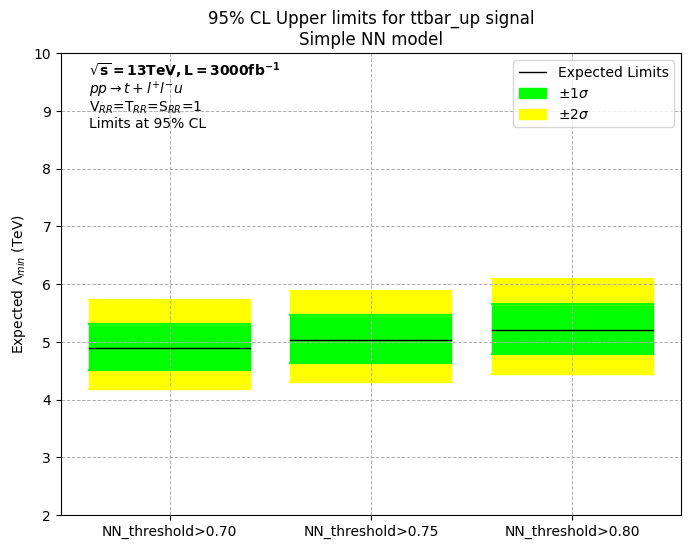

In [2]:
UL_plots(13 * (10**-15), '[array(0.05269896), array(0.07062754), array(0.09804581), array(0.13646375), array(0.18316102)]',
         '[array(0.05785937), array(0.0771915), array(0.10723602), array(0.14957288), array(0.20076334)]',
         '[array(0.06315661), array(0.0845425), array(0.11769423), array(0.16410957), array(0.22086783)]',
         690.6, 564.6, 451.2,
         'ttbar_up', 'NN_threshold>0.70', 'NN_threshold>0.75', 'NN_threshold>0.80', 'Simple NN model', [2,10])

[5.942450472150738, 5.525471988031871, 5.0953537721314905, 4.68854737802512, 4.355388244329123]
[6.142084345275519, 5.71187023344902, 5.259294425876145, 4.841217339331114, 4.496259104046498]
[6.334753454305017, 5.88896724320851, 5.423898467206779, 4.993061856808965, 4.633399689249965]


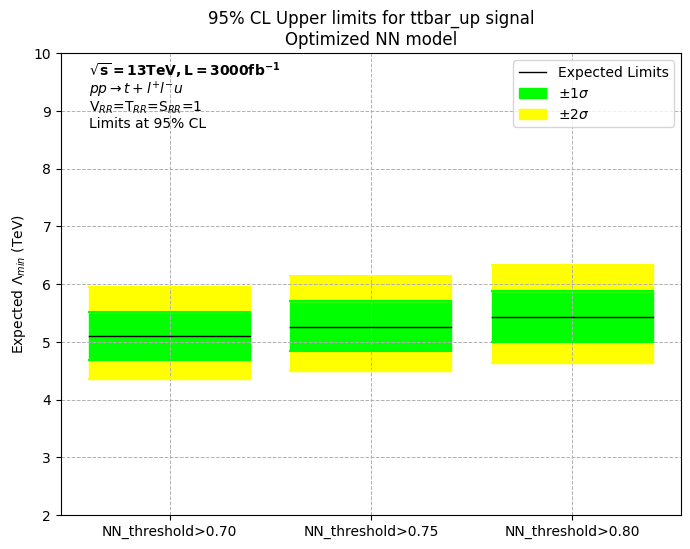

In [3]:
UL_plots(13 * (10**-15),'[array(0.04958047), array(0.06632777), array(0.09172243), array(0.12794393), array(0.17181672)]',
         '[array(0.05229621), array(0.06992299), array(0.09727996), array(0.13549242), array(0.18210757)]',
         '[array(0.05636122), array(0.0754645), array(0.10487043), array(0.14602643), array(0.1969247)]',
         630.8, 524.0, 429.7,
         'ttbar_up', 'NN_threshold>0.70', 'NN_threshold>0.75', 'NN_threshold>0.80', 'Optimized NN model', [2,10])

[5.627361686373623, 5.236579623751551, 4.820469768540852, 4.4383017616788765, 4.123152186814276]
[5.820791120703221, 5.411186918595743, 4.981181131875455, 4.583086250846178, 4.25402431194094]
[6.355562716789043, 5.905428477469069, 5.4411440468034495, 5.00919765994144, 4.652595304810047]


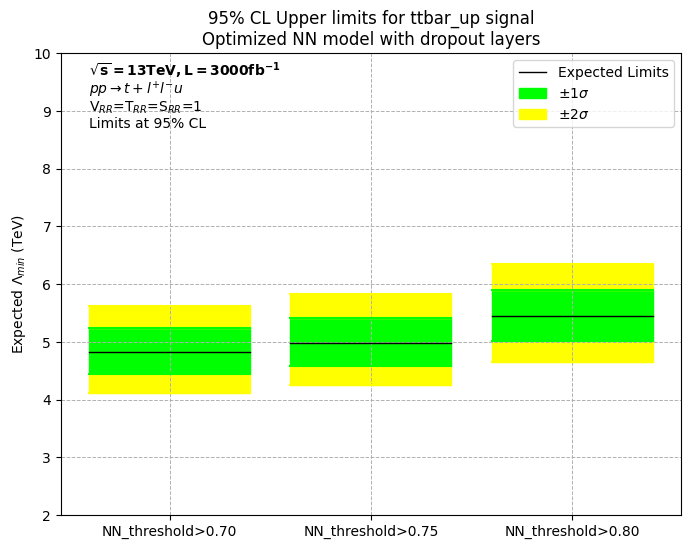

In [4]:
UL_plots(13 * (10**-15),'[array(0.05179206), array(0.06907035), array(0.09618892), array(0.13384902), array(0.17970702)]',
        '[array(0.06313549), array(0.08453401), array(0.11772597), array(0.16427425), array(0.22131036)]',
        '[array(0.05562669), array(0.07462659), array(0.1035472), array(0.14415396), array(0.19369488)]',
         750.9, 538.1, 429.7,
         'ttbar_up', 'NN_threshold>0.70', 'NN_threshold>0.75', 'NN_threshold>0.80', 'Optimized NN model with dropout layers', [2,10])

[3.0017325648307978, 2.7897064060860304, 2.5710263377290343, 2.366412559272378, 2.1985317131368136]
[5.5941302376895, 5.205798385437735, 4.7920699895837, 4.412373716924006, 4.0994384650709685]
[6.156977035038207, 5.729416782230029, 5.274145028720912, 4.856009537719296, 4.511199873229114]


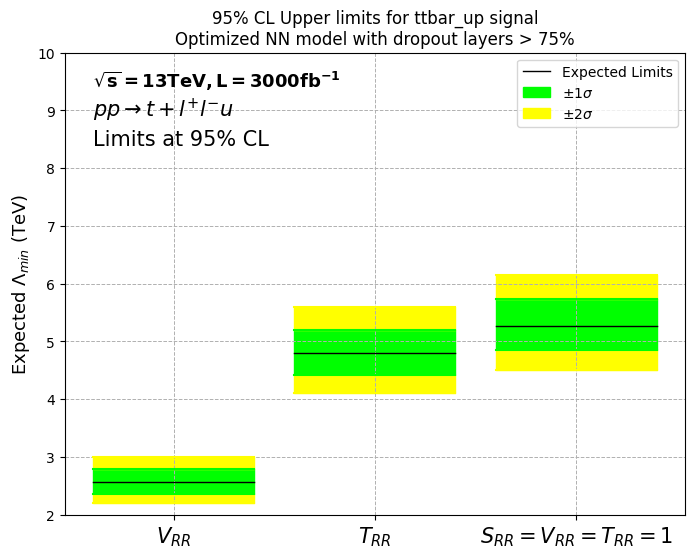

In [5]:
UL_all_plots('[array(0.66880727), array(0.89650966), array(1.24269019), array(1.73151846), array(2.32411725)]',
         '[array(0.05184143), array(0.06912862), array(0.09627525), array(0.13394241), array(0.17976692)]',
         '[array(0.05179206), array(0.06907035), array(0.09618892), array(0.13384902), array(0.17970702)]',
         44.2, 590.9, 524.0, 8 * (10**-16), 10 * (10**-15), 13 * (10**-15),
         'ttbar_up', '$V_{RR}$', '$T_{RR}$', '$S_{RR}=V_{RR}=T_{RR}=1$', 'Optimized NN model with dropout layers > 75%', [2,10])

[3.1547641620959492, 2.9301730306228655, 2.6997871556625617, 2.484409518607543, 2.3075250908200466]
[5.788539002074547, 5.385306823266078, 4.959860900874092, 4.565593605551886, 4.241152732944684]
[6.355562716789043, 5.905428477469069, 5.4411440468034495, 5.00919765994144, 4.652595304810047]


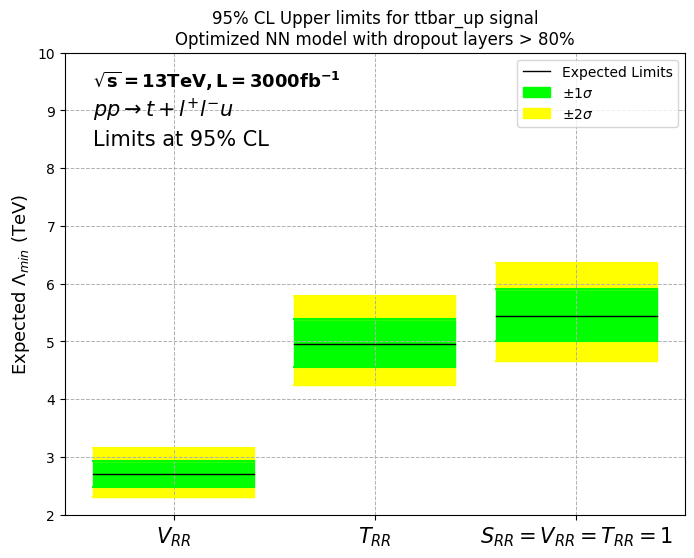

In [6]:
UL_all_plots('[array(0.69825519), array(0.93822867), array(1.30185813), array(1.8154698), array(2.43947313)]',
         '[array(0.05729106), array(0.07647525), array(0.10628812), array(0.14803817), array(0.19880489)]',
         '[array(0.05562669), array(0.07462659), array(0.1035472), array(0.14415396), array(0.19369488)]',
         34.7, 466.4, 429.7, 8 * (10**-16), 10 * (10**-15), 13 * (10**-15),
         'ttbar_up', '$V_{RR}$', '$T_{RR}$', '$S_{RR}=V_{RR}=T_{RR}=1$', 'Optimized NN model with dropout layers > 80%', [2,10])

In [7]:
        '[array(0.05562669), array(0.07462659), array(0.1035472), array(0.14415396), array(0.19369488)]',


('[array(0.05562669), array(0.07462659), array(0.1035472), array(0.14415396), array(0.19369488)]',)

[2.3181070698270996, 2.1536006820623426, 1.9837805158789141, 1.8255911564091434, 1.7172184261467562]
[3.1547641620959492, 2.9301730306228655, 2.6997871556625617, 2.484409518607543, 2.3075250908200466]
[5.788539002074547, 5.385306823266078, 4.959860900874092, 4.565593605551886, 4.241152732944684]
[6.355562716789043, 5.905428477469069, 5.4411440468034495, 5.00919765994144, 4.652595304810047]


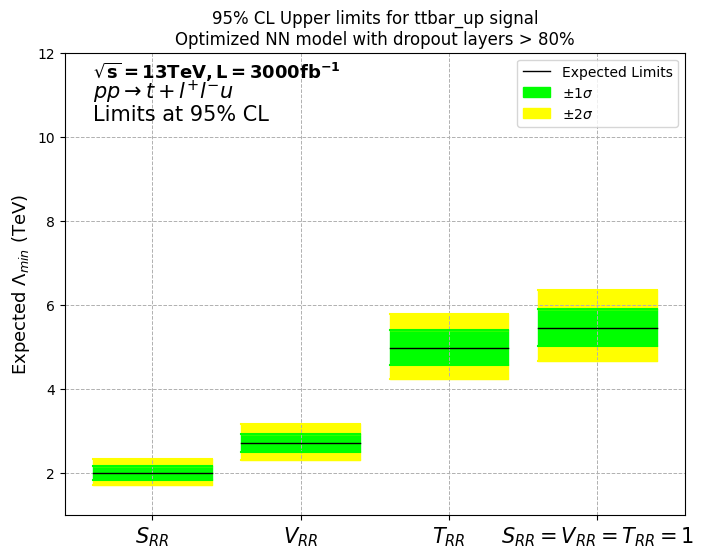

In [8]:
UL_SRR_plots('[array(3.01139825), array(4.04242005), array(5.6147145), array(7.82867144), array(10.)]',
         '[array(0.69825519), array(0.93822867), array(1.30185813), array(1.8154698), array(2.43947313)]',
         '[array(0.05729106), array(0.07647525), array(0.10628812), array(0.14803817), array(0.19880489)]',
         '[array(0.05562669), array(0.07462659), array(0.1035472), array(0.14415396), array(0.19369488)]',
         6.9, 34.7, 466.4, 429.7, 2 * (10**-16), 8 * (10**-16), 10 * (10**-15), 13 * (10**-15),
         'ttbar_up', '$S_{RR}$', '$V_{RR}$', '$T_{RR}$', '$S_{RR}=V_{RR}=T_{RR}=1$', 'Optimized NN model with dropout layers > 80%', [1,12])

In [11]:
UL_all_plots('[array(1.90610693), array(2.49076214), array(3.31276821), array(4.34966138), array(5.4593862)]',
         '[array(0.17541931), array(0.22501041), array(0.29913343), array(0.38813917), array(0.48370442)]',
         '[array(0.06313549), array(0.08453401), array(0.11772597), array(0.16427425), array(0.22131036)]',
         'ttbar_up', '$V_{RR}$', '$T_{RR}$', '$S_{RR}=V_{RR}=T_{RR}=1$', 'Optimized NN model with dropout layers > 85%', [0,3])

TypeError: UL_all_plots() missing 6 required positional arguments: 'x_title', 'weight_low', 'weight_med', 'weight_high', 'model', and 'y_lim'

# ttbar charm

[5.93656847027036, 5.511825091983732, 5.0798696466303195, 4.675946013863297, 4.344316396548811]
[6.117690462268029, 5.6849075770484765, 5.236266197308993, 4.821410156350936, 4.478195015628469]
[6.466756882657924, 6.004235151666012, 5.5315675229217725, 5.0919960052560915, 4.728363274654481]


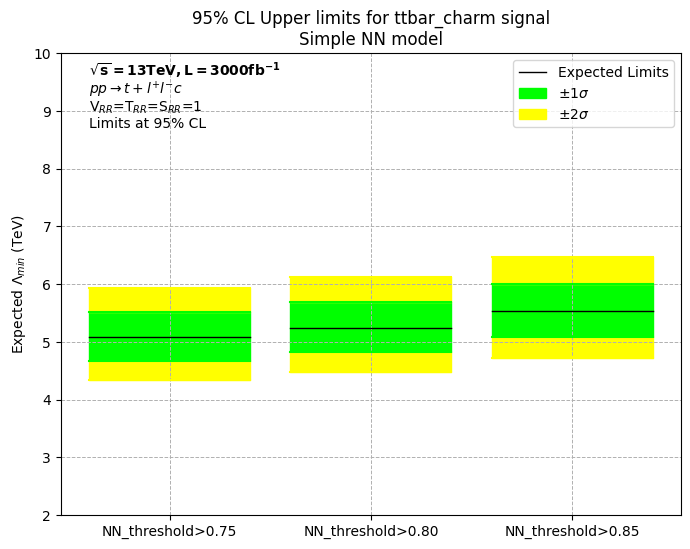

In [9]:
UL_plots(13 * (10**-15), '[array(0.06126731), array(0.08244969), array(0.11427743), array(0.15918157), array(0.21364117)]',
         '[array(0.0680423), array(0.09125052), array(0.12677748), array(0.17637323), array(0.23698288)]',
         '[array(0.07671379), array(0.10322593), array(0.14329357), array(0.19955718), array(0.26839612)]',
         512.5, 409.2, 290.7,
         'ttbar_charm', 'NN_threshold>0.75', 'NN_threshold>0.80', 'NN_threshold>0.85', 'Simple NN model', [2,10])

[6.132097063903223, 5.699816280108872, 5.254255558210516, 4.8373551854016625, 4.49463264938805]
[6.37892175058919, 5.928453896046135, 5.464142120073705, 5.030676034150758, 4.672681735795826]
[6.730461148140183, 6.256383779995477, 5.767284478724444, 5.306443922726339, 4.927613672931802]


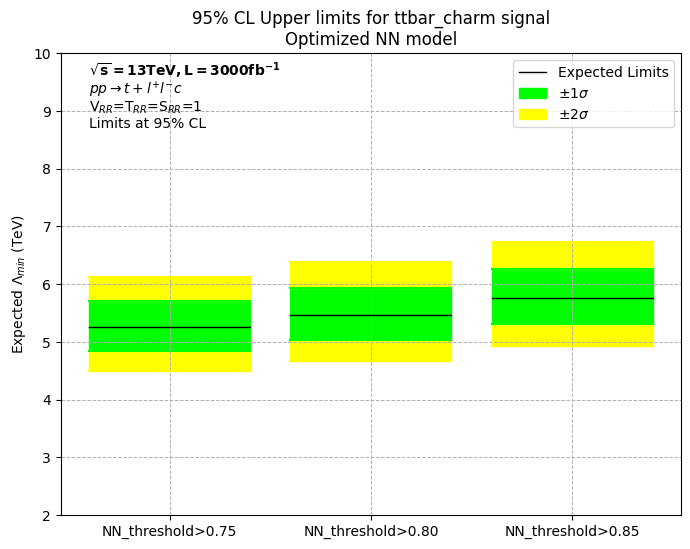

In [10]:
UL_plots(13 * (10**-15), '[array(0.04862866), array(0.06514558), array(0.09021601), array(0.12557306), array(0.16848125)]',
         '[array(0.04836671), array(0.06482908), array(0.08983544), array(0.12503461), array(0.16798513)]',
         '[array(0.04902183), array(0.06565613), array(0.090925), array(0.1268687), array(0.17061696)]',
         567.2, 487.0, 387.7,
         'ttbar_charm', 'NN_threshold>0.75', 'NN_threshold>0.80', 'NN_threshold>0.85', 'Optimized NN model', [2,10])

[6.116406140520868, 5.694993530696301, 5.24466979281849, 4.826957632204552, 4.483076378042342]
[6.389503308425026, 5.9481637883097935, 5.477565296560595, 5.0389206827917725, 4.675943855382277]
[6.660615928943091, 6.199308956153791, 5.705133127318337, 5.2510849134942665, 4.877415494125038]


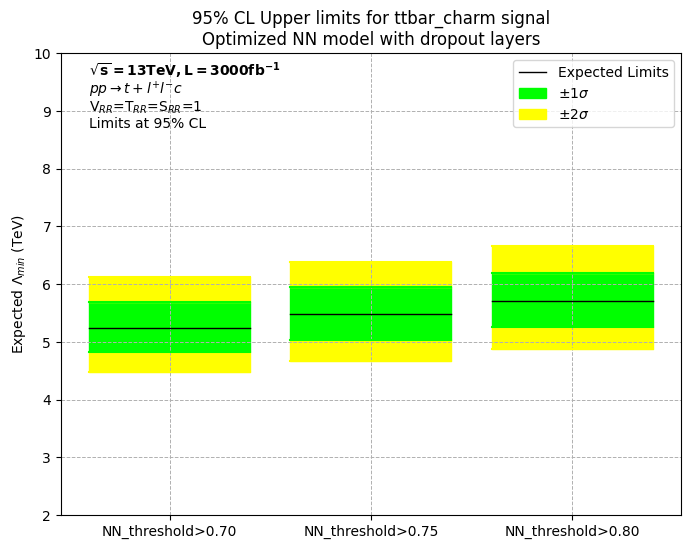

In [11]:
UL_plots(13 * (10**-15), '[array(0.04092569), array(0.05445131), array(0.07570223), array(0.10550847), array(0.14180016)]',
         '[array(0.04099324), array(0.05458194), array(0.07589801), array(0.10598162), array(0.14292345)]',
        '[array(0.04021021), array(0.05358223), array(0.07470175), array(0.1040873), array(0.13984112)]',

         680.9, 570.8, 492.8,             
         'ttbar_charm', 'NN_threshold>0.70', 'NN_threshold>0.75', 'NN_threshold>0.80', 'Optimized NN model with dropout layers', [2,10])

[3.01402036538239, 2.8007413156689105, 2.5803754720225887, 2.3755762082044103, 2.2067266884639616]
[5.667939192280393, 5.264800737919717, 4.849965240838598, 4.466341198087788, 4.149134926356599]
[6.393819119239328, 5.953293107741438, 5.482544688009247, 5.045886961639767, 4.686408783262441]


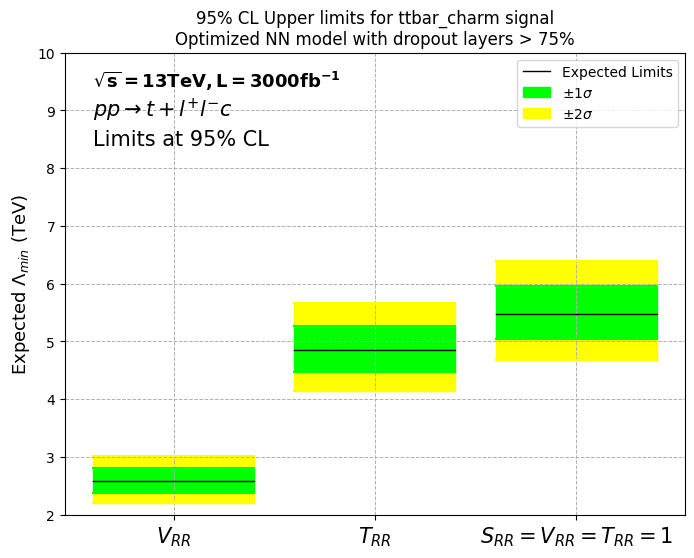

In [46]:
UL_all_plots('[array(0.70587743), array(0.94672105), array(1.31396079), array(1.82910298), array(2.45651735)]',
         '[array(0.04689958), array(0.0630002), array(0.08748129), array(0.12163599), array(0.16332003)]',
         '[array(0.04092569), array(0.05445131), array(0.07570223), array(0.10550847), array(0.14180016)]',
         41.2, 619.8, 570.2, 8 * (10**-16), 10 * (10**-15), 13 * (10**-15),
         'ttbar_charm', '$V_{RR}$', '$T_{RR}$', '$S_{RR}=V_{RR}=T_{RR}=1$', 'Optimized NN model with dropout layers > 75%', [2,10])

In [ ]:
UL_all_plots('[array(3.11914359), array(4.19031883), array(5.81938986), array(8.10755279), array(10.)]',
         '[array(0.70587743), array(0.94672105), array(1.31396079), array(1.82910298), array(2.45651735)]',
         '[array(0.04689958), array(0.0630002), array(0.08748129), array(0.12163599), array(0.16332003)]',
         '[array(0.04092569), array(0.05445131), array(0.07570223), array(0.10550847), array(0.14180016)]',
         31.0, 553.7, 492.8, 8 * (10**-16), 10 * (10**-15), 13 * (10**-15),
         'ttbar_charm', '$V_{RR}$', '$T_{RR}$', '$S_{RR}=V_{RR}=T_{RR}=1$', 'Optimized NN model with dropout layers > 80%', [2,10])

TypeError: UL_SRR_plots() missing 3 required positional arguments: 'weight_high', 'model', and 'y_lim'

[2.2003462767135282, 2.044196881146233, 1.883003649290705, 1.7328503743813757, 1.629983023414749]
[3.24495623542085, 3.013944231021251, 2.776971816256452, 2.5554367123875257, 2.3734953064991866]
[5.545490535144321, 5.159189219692082, 4.751606868602289, 4.373894020206061, 4.063075731236703]
[6.141545480799781, 5.706569063063236, 5.2579189475624135, 4.840517924491332, 4.495923798024078]


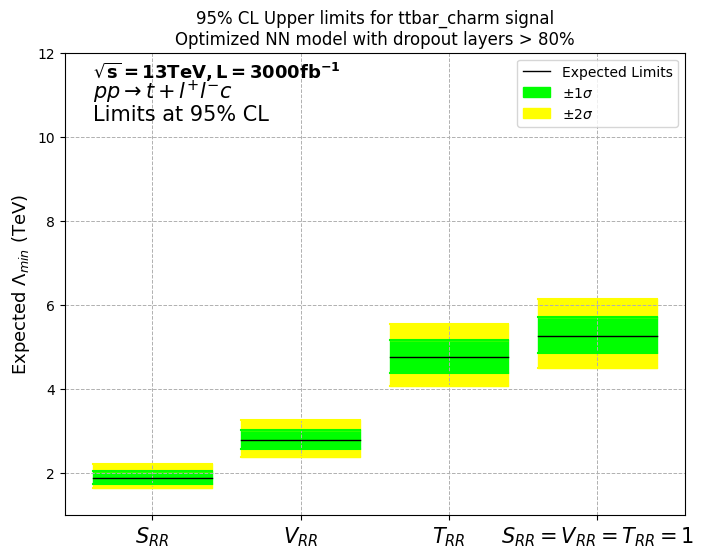

In [48]:
UL_SRR_plots('[array(3.01139825), array(4.04242005), array(5.6147145), array(7.82867144), array(10.)]',
         '[array(0.69825519), array(0.93822867), array(1.30185813), array(1.8154698), array(2.43947313)]',
         '[array(0.05729106), array(0.07647525), array(0.10628812), array(0.14803817), array(0.19880489)]',
         '[array(0.05562669), array(0.07462659), array(0.1035472), array(0.14415396), array(0.19369488)]',
          8.5, 31.0, 553.7, 492.8, 2 * (10**-16), 8 * (10**-16), 10 * (10**-15), 13 * (10**-15),
         'ttbar_charm', '$S_{RR}$', '$V_{RR}$', '$T_{RR}$', '$S_{RR}=V_{RR}=T_{RR}=1$', 'Optimized NN model with dropout layers > 80%', [1,12])

# New tW-charm

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import array
import ast

def array_to_list(CL, N_sig, xsec):
    #ttbar_xsec = 13 * (10**-15)
    ttbar_xsec = xsec
    lumi = 3 * (10**18)

    CL = CL.replace('array', '')
    CL = CL.replace('(', '')
    CL = CL.replace(')', '')    
    CL = ast.literal_eval(CL)

    Lambda = [((ttbar_xsec * lumi) / (N_sig * mu))**(1/4) for mu in CL]    
    return Lambda

def tW_UL_plots(xsec, NN_low, NN_med, NN_high, n_sig_low, n_sig_med, n_sig_high, x_title, weight_low, weight_med, weight_high, model, y_lim):

    # Convert strings to lists
    NN_low = array_to_list(NN_low, n_sig_low, xsec)
    NN_med = array_to_list(NN_med, n_sig_med, xsec)
    NN_high = array_to_list(NN_high, n_sig_high, xsec)

    # Generate some example data (x values)
    x_values_low = np.linspace(1, 3, 2)
    x_values_med = np.linspace(3.5, 5.5, 2)
    x_values_high = np.linspace(6, 8, 2)

    def scalar(list1, list2):
        final_list = []        
        val = 1
        for i in range(len(list1)):
            final_list.append(list2[i] + (list1[i] - list2[i]) * val)
        return final_list

    # Calculate upper and lower limits for a 95% confidence level
    NN_low_med = [NN_low[2],NN_low[2]]
    lower_NN_low1 = [NN_low[1],NN_low[1]]; lower_NN_low1 = scalar(lower_NN_low1, NN_low_med)
    upper_NN_low1 = [NN_low[3],NN_low[3]]; upper_NN_low1 = scalar(upper_NN_low1, NN_low_med)
    lower_NN_low2 = [NN_low[0],NN_low[0]]; lower_NN_low2 = scalar(lower_NN_low2, NN_low_med)
    upper_NN_low2 = [NN_low[4],NN_low[4]]; upper_NN_low2 = scalar(upper_NN_low2, NN_low_med)

    NN_med_med = [NN_med[2],NN_med[2]]
    lower_NN_med1 = [NN_med[1],NN_med[1]]; lower_NN_med1 = scalar(lower_NN_med1, NN_low_med)
    upper_NN_med1 = [NN_med[3],NN_med[3]]; upper_NN_med1 = scalar(upper_NN_med1, NN_low_med)
    lower_NN_med2 = [NN_med[0],NN_med[0]]; lower_NN_med2 = scalar(lower_NN_med2, NN_low_med)
    upper_NN_med2 = [NN_med[4],NN_med[4]]; upper_NN_med2 = scalar(upper_NN_med2, NN_low_med)

    NN_high_med = [NN_high[2],NN_high[2]]
    lower_NN_high1 = [NN_high[1],NN_high[1]]; lower_NN_high1 = scalar(lower_NN_high1, NN_low_med)
    upper_NN_high1 = [NN_high[3],NN_high[3]]; upper_NN_high1 = scalar(upper_NN_high1, NN_low_med)
    lower_NN_high2 = [NN_high[0],NN_high[0]]; lower_NN_high2 = scalar(lower_NN_high2, NN_low_med)
    upper_NN_high2 = [NN_high[4],NN_high[4]]; upper_NN_high2 = scalar(upper_NN_high2, NN_low_med)


    # Create the plot for low NN_weight
    plt.figure(figsize=(8, 6), dpi=100)
    plt.plot(x_values_low, NN_low_med, label='Expected Limits', color='black', linewidth=1)
    plt.plot(x_values_low, lower_NN_low1, color='lime')
    plt.plot(x_values_low, lower_NN_low2, color='yellow')
    plt.plot(x_values_low, upper_NN_low1, color='lime')
    plt.plot(x_values_low, upper_NN_low2, color='yellow')

    plt.fill_between(x_values_low, NN_low_med, lower_NN_low1, color='lime', label='$\pm$1$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, NN_low_med, upper_NN_low1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_low, lower_NN_low1, lower_NN_low2, color='yellow', label='$\pm$2$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, upper_NN_low1, upper_NN_low2, color='yellow')  # Fill area between curves

    # Create the plot for med NN_weight
    plt.plot(x_values_med, NN_med_med, color='black', linewidth=1)
    plt.plot(x_values_med, lower_NN_med1, color='lime')
    plt.plot(x_values_med, lower_NN_med2, color='yellow')
    plt.plot(x_values_med, upper_NN_med1, color='lime')
    plt.plot(x_values_med, upper_NN_med2, color='yellow')

    plt.fill_between(x_values_med, NN_med_med, lower_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, NN_med_med, upper_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, lower_NN_med1, lower_NN_med2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_med, upper_NN_med1, upper_NN_med2, color='yellow')  # Fill area between curves

    # Create the plot for low NN_weight
    plt.plot(x_values_high, NN_high_med, color='black', linewidth=1)
    plt.plot(x_values_high, lower_NN_high1, color='lime')
    plt.plot(x_values_high, lower_NN_high2, color='yellow')
    plt.plot(x_values_high, upper_NN_high1, color='lime')
    plt.plot(x_values_high, upper_NN_high2, color='yellow')

    plt.fill_between(x_values_high, NN_high_med, lower_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, NN_high_med, upper_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, lower_NN_high1, lower_NN_high2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_high, upper_NN_high1, upper_NN_high2, color='yellow')  # Fill area between curves


    # Add labels and title
    plt.xticks([])
    #plt.xlabel(x_title)
    #plt.ylabel('Signal strength ($\mu$)')
    plt.ylabel('Expected $\Lambda_{min}$ (TeV)')
    plt.ylim(y_lim)
    plt.title('95% CL Upper limits for {} signal\n{}'.format(x_title, model))
    plt.legend()

    # Customize x-axis ticks and labels
    x_ticks = [2, 4.5, 7]  # Specify the tick locations
    #x_tick_labels = ['SRR', 'VRR', 'TRR']  # Specify the tick labels
    x_tick_labels = [weight_low, weight_med, weight_high]  # Specify the tick labels
    plt.xticks(x_ticks, x_tick_labels, fontsize=12)  # Apply custom ticks and labels
    '''
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\mathrm{median}=%.2f$' % (median, ),
        r'$\sigma=%.2f$' % (sigma, )))
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    '''
    y_lim_text = y_lim[1] - 0.4
    count=0
    plt.text(1, y_lim_text, r'$\bf{\sqrt{s}=13 TeV, L=3000 fb^{-1}}$', fontsize=13); count +=1
    if x_title == 'ttbar_charm':
        plt.text(1, y_lim_text-count*0.3 , r'$pp \rightarrow t+l^{+}l^{-}c$', fontsize=15) 
    if x_title == 'ttbar_up':
        plt.text(1, y_lim_text-count*0.3 , r'$pp \rightarrow t+l^{+}l^{-}u$', fontsize=15)
    if x_title == 'tW_up':
        plt.text(1, y_lim_text-count*0.3 , r'$pp \rightarrow W+l^{+}l^{-}u$', fontsize=15)  
    if x_title == 'tW_charm':
        plt.text(1, y_lim_text-count*0.3 , r'$pp \rightarrow W+l^{+}l^{-}c$', fontsize=15)                     
    count +=1;
    plt.text(1, y_lim_text-count*0.3, 'V$_{RR}$=T$_{RR}$=S$_{RR}$=1', fontsize=15) 
    count +=1;
    plt.text(1, y_lim_text-count*0.3, 'Limits at 95% CL', fontsize=15) 
    
    # Show the plot
    #plt.grid(True)
    #plt.minorticks_on()  # Turn on minor ticks
    plt.grid(which='both', linestyle='--', linewidth=0.7)

    plt.show()


def UL_all_plots(NN_low, NN_med, NN_high, n_sig_low, n_sig_med, n_sig_high, x_sec_low, x_sec_med, x_sec_high, x_title, weight_low, weight_med, weight_high, model, y_lim):

    # Convert strings to lists
    NN_low = array_to_list(NN_low, n_sig_low, x_sec_low)
    NN_med = array_to_list(NN_med, n_sig_med, x_sec_med)
    NN_high = array_to_list(NN_high, n_sig_high, x_sec_high)

    # Generate some example data (x values)
    x_values_low = np.linspace(1, 3, 2)
    x_values_med = np.linspace(3.5, 5.5, 2)
    x_values_high = np.linspace(6, 8, 2)


    # Calculate upper and lower limits for a 95% confidence level
    NN_low_med = [NN_low[2],NN_low[2]]
    lower_NN_low1 = [NN_low[1],NN_low[1]]
    upper_NN_low1 = [NN_low[3],NN_low[3]]
    lower_NN_low2 = [NN_low[0],NN_low[0]]
    upper_NN_low2 = [NN_low[4],NN_low[4]]

    NN_med_med = [NN_med[2],NN_med[2]]
    lower_NN_med1 = [NN_med[1],NN_med[1]]
    upper_NN_med1 = [NN_med[3],NN_med[3]]
    lower_NN_med2 = [NN_med[0],NN_med[0]]
    upper_NN_med2 = [NN_med[4],NN_med[4]]

    NN_high_med = [NN_high[2],NN_high[2]]
    lower_NN_high1 = [NN_high[1],NN_high[1]]
    upper_NN_high1 = [NN_high[3],NN_high[3]]
    lower_NN_high2 = [NN_high[0],NN_high[0]]
    upper_NN_high2 = [NN_high[4],NN_high[4]]    


    # Create the plot for low NN_weight
    plt.figure(figsize=(8, 6), dpi=100)
    plt.plot(x_values_low, NN_low_med, label='Expected Limits', color='black', linewidth=1)
    plt.plot(x_values_low, lower_NN_low1, color='lime')
    plt.plot(x_values_low, lower_NN_low2, color='yellow')
    plt.plot(x_values_low, upper_NN_low1, color='lime')
    plt.plot(x_values_low, upper_NN_low2, color='yellow')

    plt.fill_between(x_values_low, NN_low_med, lower_NN_low1, color='lime', label='$\pm$1$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, NN_low_med, upper_NN_low1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_low, lower_NN_low1, lower_NN_low2, color='yellow', label='$\pm$2$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, upper_NN_low1, upper_NN_low2, color='yellow')  # Fill area between curves

    # Create the plot for med NN_weight
    plt.plot(x_values_med, NN_med_med, color='black', linewidth=1)
    plt.plot(x_values_med, lower_NN_med1, color='lime')
    plt.plot(x_values_med, lower_NN_med2, color='yellow')
    plt.plot(x_values_med, upper_NN_med1, color='lime')
    plt.plot(x_values_med, upper_NN_med2, color='yellow')

    plt.fill_between(x_values_med, NN_med_med, lower_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, NN_med_med, upper_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, lower_NN_med1, lower_NN_med2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_med, upper_NN_med1, upper_NN_med2, color='yellow')  # Fill area between curves

    # Create the plot for low NN_weight
    plt.plot(x_values_high, NN_high_med, color='black', linewidth=1)
    plt.plot(x_values_high, lower_NN_high1, color='lime')
    plt.plot(x_values_high, lower_NN_high2, color='yellow')
    plt.plot(x_values_high, upper_NN_high1, color='lime')
    plt.plot(x_values_high, upper_NN_high2, color='yellow')

    plt.fill_between(x_values_high, NN_high_med, lower_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, NN_high_med, upper_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, lower_NN_high1, lower_NN_high2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_high, upper_NN_high1, upper_NN_high2, color='yellow')  # Fill area between curves


    # Add labels and title
    plt.xticks([])
    #plt.xlabel(x_title)
    plt.ylim(y_lim)
    plt.ylabel('Expected $\Lambda_{min}$ (TeV)')    
    plt.title('95% CL Upper limits for {} signal\n{}'.format(x_title, model))
    plt.legend()

    # Customize x-axis ticks and labels
    x_ticks = [2, 4.5, 7]  # Specify the tick locations
    #x_tick_labels = ['SRR', 'VRR', 'TRR']  # Specify the tick labels
    x_tick_labels = [weight_low, weight_med, weight_high]  # Specify the tick labels
    plt.xticks(x_ticks, x_tick_labels, fontsize=15)  # Apply custom ticks and labels
    '''
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\mathrm{median}=%.2f$' % (median, ),
        r'$\sigma=%.2f$' % (sigma, )))
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    '''
    y_lim_text = y_lim[1] - 0.4
    count=0
    plt.text(1, y_lim_text, r'$\bf{\sqrt{s}=13 TeV, L=3000 fb^{-1}}$'); count +=1
    if x_title == 'ttbar_charm':
        plt.text(1, y_lim_text-count*0.3 , r'$pp \rightarrow t+l^{+}l^{-}c$') 
    if x_title == 'ttbar_up':
        plt.text(1, y_lim_text-count*0.3 , r'$pp \rightarrow t+l^{+}l^{-}u$')
    if x_title == 'tW_up':
        plt.text(1, y_lim_text-count*0.3 , r'$pp \rightarrow W+l^{+}l^{-}u$')                 
    count +=1;
    plt.text(1, y_lim_text-count*0.3, 'Limits at 95% CL') 
    
    # Show the plot
    #plt.grid(True)
    #plt.minorticks_on()  # Turn on minor ticks
    plt.grid(which='both', linestyle='--', linewidth=0.7)

    plt.show()        

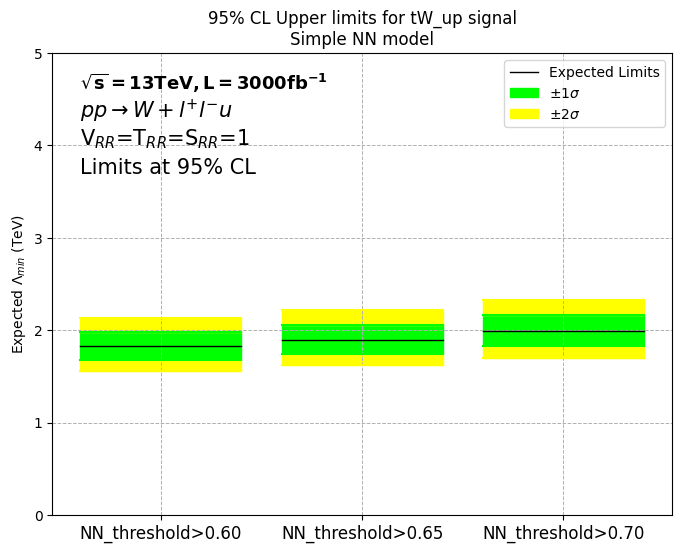

In [15]:
tW_UL_plots(7 * (10**-16), '[array(2.08139837), array(2.79211858), array(3.87291747), array(5.38554475), array(7.22460213)]',
         '[array(2.17553695), array(2.91321551), array(4.03808161), array(5.61378707), array(7.52972251)]',
         '[array(2.29692194), array(3.08163648), array(4.28341629), array(5.95708936), array(7.98531722)]',
         48.7, 40.2, 31.3,
         'tW_up', 'NN_threshold>0.60', 'NN_threshold>0.65', 'NN_threshold>0.70', 'Simple NN model', [0,5])

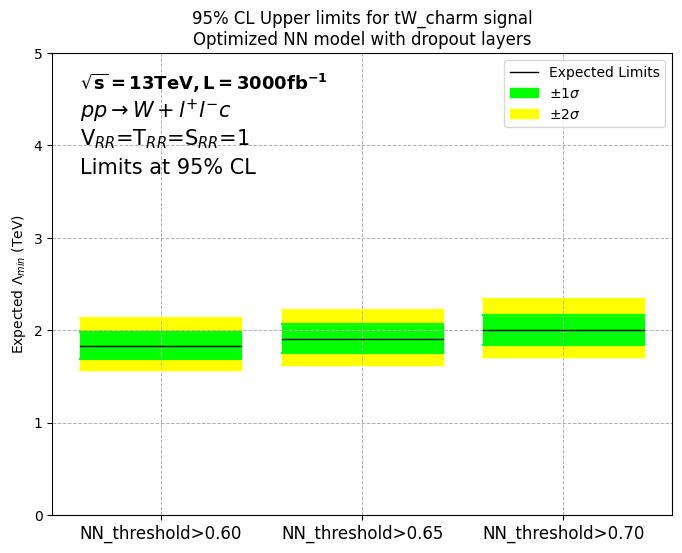

In [16]:
tW_UL_plots(7 * (10**-16), '[array(2.2178303), array(2.97172762), array(4.11355695), array(5.72868785), array(7.67464377)]',
         '[array(2.26755979), array(3.04019467), array(4.22109473), array(5.86678074), array(7.86824505)]',
         '[array(2.35684634), array(3.16319373), array(4.38284191), array(6.10074014), array(8.17780287)]',
         45.6, 38.1, 30.1,
         'tW_charm', 'NN_threshold>0.60', 'NN_threshold>0.65', 'NN_threshold>0.70', 'Optimized NN model with dropout layers', [0,5])

# tW-charm signal

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import array
import ast

def array_to_list(CL):
    CL = CL.replace('array', '')
    CL = CL.replace('(', '')
    CL = CL.replace(')', '')

    CL = ast.literal_eval(CL)    
    return CL

test = '[array(0.18526298), array(0.23544205), array(0.29602205), array(0.39099281), array(0.48986435)]'
array_to_list(test)

def tW_UL_plots(NN_low, NN_med, NN_high, x_title, weight_low, weight_med, weight_high, model, y_lim, factor):
#def UL_plots():

    # Convert strings to lists
    NN_low = array_to_list(NN_low)
    NN_med = array_to_list(NN_med)
    NN_high = array_to_list(NN_high)

    # Generate some example data (x values)
    x_values_low = np.linspace(1, 3, 2)
    x_values_med = np.linspace(3.5, 5.5, 2)
    x_values_high = np.linspace(6, 8, 2)


    # Calculate upper and lower limits for a 95% confidence level
    NN_low_med = [NN_low[2],NN_low[2]]
    lower_NN_low1 = [NN_low[1],NN_low[1]]
    upper_NN_low1 = [NN_low[3],NN_low[3]]
    lower_NN_low2 = [NN_low[0],NN_low[0]]
    upper_NN_low2 = [NN_low[4],NN_low[4]]

    NN_med_med = [NN_med[2],NN_med[2]]
    lower_NN_med1 = [NN_med[1],NN_med[1]]
    upper_NN_med1 = [NN_med[3],NN_med[3]]
    lower_NN_med2 = [NN_med[0],NN_med[0]]
    upper_NN_med2 = [NN_med[4],NN_med[4]]

    NN_high_med = [NN_high[2],NN_high[2]]
    lower_NN_high1 = [NN_high[1],NN_high[1]]
    upper_NN_high1 = [NN_high[3],NN_high[3]]
    lower_NN_high2 = [NN_high[0],NN_high[0]]
    upper_NN_high2 = [NN_high[4],NN_high[4]]    


    # Create the plot for low NN_weight
    plt.figure(figsize=(8, 6), dpi=100)
    plt.plot(x_values_low, NN_low_med, label='Expected Limits', color='black', linewidth=1)
    plt.plot(x_values_low, lower_NN_low1, color='lime')
    plt.plot(x_values_low, lower_NN_low2, color='yellow')
    plt.plot(x_values_low, upper_NN_low1, color='lime')
    plt.plot(x_values_low, upper_NN_low2, color='yellow')

    plt.fill_between(x_values_low, NN_low_med, lower_NN_low1, color='lime', label='$\pm$1$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, NN_low_med, upper_NN_low1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_low, lower_NN_low1, lower_NN_low2, color='yellow', label='$\pm$2$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, upper_NN_low1, upper_NN_low2, color='yellow')  # Fill area between curves

    # Create the plot for med NN_weight
    plt.plot(x_values_med, NN_med_med, color='black', linewidth=1)
    plt.plot(x_values_med, lower_NN_med1, color='lime')
    plt.plot(x_values_med, lower_NN_med2, color='yellow')
    plt.plot(x_values_med, upper_NN_med1, color='lime')
    plt.plot(x_values_med, upper_NN_med2, color='yellow')

    plt.fill_between(x_values_med, NN_med_med, lower_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, NN_med_med, upper_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, lower_NN_med1, lower_NN_med2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_med, upper_NN_med1, upper_NN_med2, color='yellow')  # Fill area between curves

    # Create the plot for low NN_weight
    plt.plot(x_values_high, NN_high_med, color='black', linewidth=1)
    plt.plot(x_values_high, lower_NN_high1, color='lime')
    plt.plot(x_values_high, lower_NN_high2, color='yellow')
    plt.plot(x_values_high, upper_NN_high1, color='lime')
    plt.plot(x_values_high, upper_NN_high2, color='yellow')

    plt.fill_between(x_values_high, NN_high_med, lower_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, NN_high_med, upper_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, lower_NN_high1, lower_NN_high2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_high, upper_NN_high1, upper_NN_high2, color='yellow')  # Fill area between curves


    # Add labels and title
    plt.xticks([])
    #plt.xlabel(x_title)
    plt.ylabel('Signal strength ($\mu$)')
    plt.ylim(y_lim)
    plt.title('95% CL Upper limits for {} signal\n{}'.format(x_title, model))
    plt.legend()

    # Customize x-axis ticks and labels
    x_ticks = [2, 4.5, 7]  # Specify the tick locations
    #x_tick_labels = ['SRR', 'VRR', 'TRR']  # Specify the tick labels
    x_tick_labels = [weight_low, weight_med, weight_high]  # Specify the tick labels
    plt.xticks(x_ticks, x_tick_labels)  # Apply custom ticks and labels
    '''
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\mathrm{median}=%.2f$' % (median, ),
        r'$\sigma=%.2f$' % (sigma, )))
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    '''
    y_lim_text = y_lim[1] - 1*factor
    count=0
    plt.text(1, y_lim_text, r'$\bf{\sqrt{s}=13 TeV, L=3000 fb^{-1}}$'); count +=1
    if x_title == 'ttbar_charm':
        plt.text(1, y_lim_text-count*0.5*factor , r'$pp \rightarrow t+l^{+}l^{-}c$') 
    if x_title == 'ttbar_up':
        plt.text(1, y_lim_text-count*0.5*factor , r'$pp \rightarrow t+l^{+}l^{-}u$')
    if x_title == 'tW_up':
        plt.text(1, y_lim_text-count*0.5*factor , r'$pp \rightarrow W+l^{+}l^{-}u$')             
    count +=1;
    plt.text(1, y_lim_text-count*0.5*factor, 'V$_{RR}$=T$_{RR}$=S$_{RR}$=1') 
    count +=1;
    plt.text(1, y_lim_text-count*0.5*factor, 'Limits at 95% CL') 
    
    # Show the plot
    #plt.grid(True)
    #plt.minorticks_on()  # Turn on minor ticks
    plt.grid(which='both', linestyle='--', linewidth=0.7)

    plt.show()

import numpy as np
import matplotlib.pyplot as plt

def tw_UL_all_plots(NN_low, NN_med, NN_high, x_title, weight_low, weight_med, weight_high, model, y_lim, factor):
#def UL_plots():

    # Convert strings to lists
    NN_low = array_to_list(NN_low)
    NN_med = array_to_list(NN_med)
    NN_high = array_to_list(NN_high)

    # Generate some example data (x values)
    x_values_low = np.linspace(1, 3, 2)
    x_values_med = np.linspace(3.5, 5.5, 2)
    x_values_high = np.linspace(6, 8, 2)


    # Calculate upper and lower limits for a 95% confidence level
    NN_low_med = [NN_low[2],NN_low[2]]
    lower_NN_low1 = [NN_low[1],NN_low[1]]
    upper_NN_low1 = [NN_low[3],NN_low[3]]
    lower_NN_low2 = [NN_low[0],NN_low[0]]
    upper_NN_low2 = [NN_low[4],NN_low[4]]

    NN_med_med = [NN_med[2],NN_med[2]]
    lower_NN_med1 = [NN_med[1],NN_med[1]]
    upper_NN_med1 = [NN_med[3],NN_med[3]]
    lower_NN_med2 = [NN_med[0],NN_med[0]]
    upper_NN_med2 = [NN_med[4],NN_med[4]]

    NN_high_med = [NN_high[2],NN_high[2]]
    lower_NN_high1 = [NN_high[1],NN_high[1]]
    upper_NN_high1 = [NN_high[3],NN_high[3]]
    lower_NN_high2 = [NN_high[0],NN_high[0]]
    upper_NN_high2 = [NN_high[4],NN_high[4]]    


    # Create the plot for low NN_weight
    plt.figure(figsize=(8, 6), dpi=100)
    plt.plot(x_values_low, NN_low_med, label='Expected Limits', color='black', linewidth=1)
    plt.plot(x_values_low, lower_NN_low1, color='lime')
    plt.plot(x_values_low, lower_NN_low2, color='yellow')
    plt.plot(x_values_low, upper_NN_low1, color='lime')
    plt.plot(x_values_low, upper_NN_low2, color='yellow')

    plt.fill_between(x_values_low, NN_low_med, lower_NN_low1, color='lime', label='$\pm$1$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, NN_low_med, upper_NN_low1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_low, lower_NN_low1, lower_NN_low2, color='yellow', label='$\pm$2$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, upper_NN_low1, upper_NN_low2, color='yellow')  # Fill area between curves

    # Create the plot for med NN_weight
    plt.plot(x_values_med, NN_med_med, color='black', linewidth=1)
    plt.plot(x_values_med, lower_NN_med1, color='lime')
    plt.plot(x_values_med, lower_NN_med2, color='yellow')
    plt.plot(x_values_med, upper_NN_med1, color='lime')
    plt.plot(x_values_med, upper_NN_med2, color='yellow')

    plt.fill_between(x_values_med, NN_med_med, lower_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, NN_med_med, upper_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, lower_NN_med1, lower_NN_med2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_med, upper_NN_med1, upper_NN_med2, color='yellow')  # Fill area between curves

    # Create the plot for low NN_weight
    plt.plot(x_values_high, NN_high_med, color='black', linewidth=1)
    plt.plot(x_values_high, lower_NN_high1, color='lime')
    plt.plot(x_values_high, lower_NN_high2, color='yellow')
    plt.plot(x_values_high, upper_NN_high1, color='lime')
    plt.plot(x_values_high, upper_NN_high2, color='yellow')

    plt.fill_between(x_values_high, NN_high_med, lower_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, NN_high_med, upper_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, lower_NN_high1, lower_NN_high2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_high, upper_NN_high1, upper_NN_high2, color='yellow')  # Fill area between curves


    # Add labels and title
    plt.xticks([])
    #plt.xlabel(x_title)
    plt.ylabel('Signal strength ($\mu$)')
    plt.ylim(y_lim)
    plt.title('95% CL Upper limits for {} signal\n{}'.format(x_title, model))
    plt.legend()

    # Customize x-axis ticks and labels
    x_ticks = [2, 4.5, 7]  # Specify the tick locations
    #x_tick_labels = ['SRR', 'VRR', 'TRR']  # Specify the tick labels
    x_tick_labels = [weight_low, weight_med, weight_high]  # Specify the tick labels
    plt.xticks(x_ticks, x_tick_labels)  # Apply custom ticks and labels
    '''
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\mathrm{median}=%.2f$' % (median, ),
        r'$\sigma=%.2f$' % (sigma, )))
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    '''
    y_lim_text = y_lim[1] - 1*factor
    count=0
    plt.text(1, y_lim_text, r'$\bf{\sqrt{s}=13 TeV, L=3000 fb^{-1}}$'); count +=1
    if x_title == 'ttbar_charm':
        plt.text(1, y_lim_text-count*0.5*factor , r'$pp \rightarrow t+l^{+}l^{-}c$') 
    if x_title == 'ttbar_up':
        plt.text(1, y_lim_text-count*0.5*factor , r'$pp \rightarrow t+l^{+}l^{-}u$')
    if x_title == 'tW_up':
        plt.text(1, y_lim_text-count*0.5*factor , r'$pp \rightarrow W+l^{+}l^{-}u$')             
    count +=1;
    plt.text(1, y_lim_text-count*0.5*factor, 'V$_{RR}$=T$_{RR}$=S$_{RR}$=1') 
    count +=1;
    plt.text(1, y_lim_text-count*0.5*factor, 'Limits at 95% CL') 
    
    # Show the plot
    #plt.grid(True)
    #plt.minorticks_on()  # Turn on minor ticks
    plt.grid(which='both', linestyle='--', linewidth=0.7)

    plt.show()    

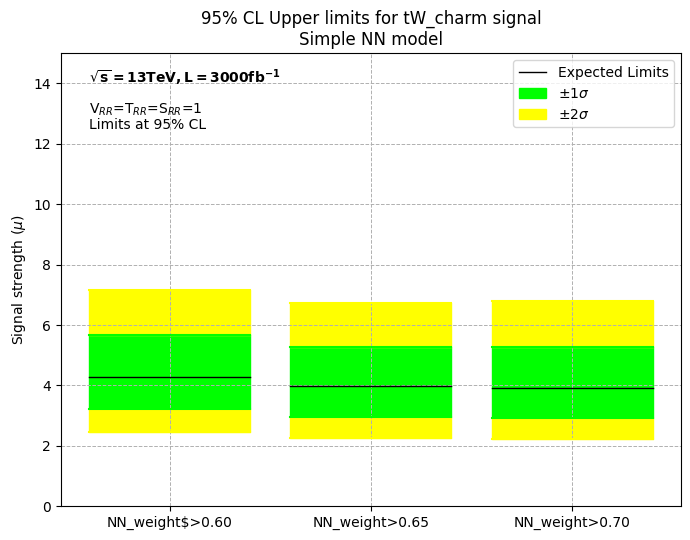

In [67]:
tW_UL_plots('[array(2.46691703), array(3.21935626), array(4.27572848), array(5.67250841), array(7.16399813)]',
         '[array(2.25758815), array(2.95286661), array(3.9625029), array(5.27246466), array(6.71822409)]',
         '[array(2.21036424), array(2.91791069), array(3.92218127), array(5.26474088), array(6.77674992)]',
         'tW_charm', 'NN_weight$>0.60', 'NN_weight>0.65', 'NN_weight>0.70', 'Simple NN model', [0,15],1)

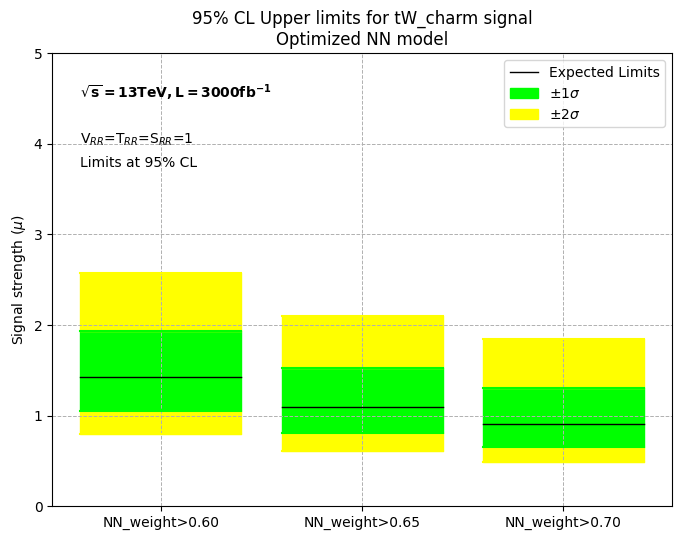

In [62]:
tW_UL_plots('[array(0.79745219), array(1.04959928), array(1.42671393), array(1.93816832), array(2.56997649)]',
         '[array(0.61002475), array(0.80263865), array(1.09746258), array(1.52917365), array(2.09644695)]',
         '[array(0.48353131), array(0.65437315), array(0.90315559), array(1.30462107), array(1.84519024)]',
         'tW_charm', 'NN_weight>0.60', 'NN_weight>0.65', 'NN_weight>0.70', 'Optimized NN model', [0,5],0.5)

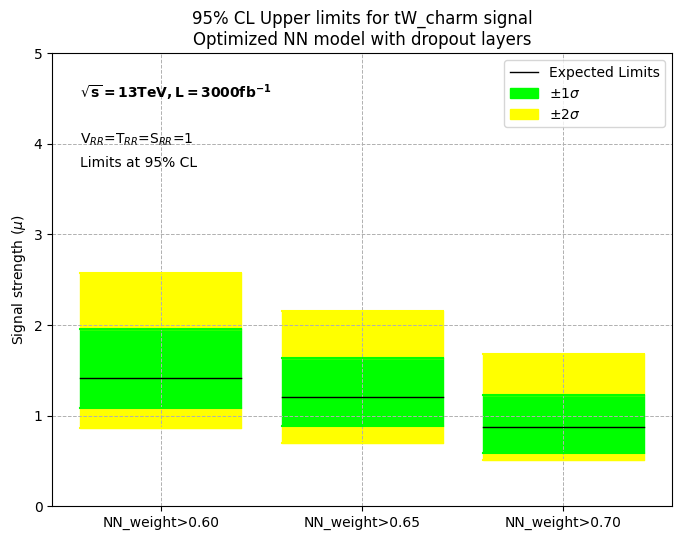

In [63]:
tW_UL_plots('[array(0.86495859), array(1.08133103), array(1.40990733), array(1.95825509), array(2.57377179)]',
         '[array(0.69992597), array(0.89001075), array(1.20383254), array(1.63052156), array(2.157451)]',
         '[array(0.50482731), array(0.59124216), array(0.87759761), array(1.22338712), array(1.67469441)]',         
         'tW_charm', 'NN_weight>0.60', 'NN_weight>0.65', 'NN_weight>0.70', 'Optimized NN model with dropout layers', [0,5],0.5)

# tW-charm all

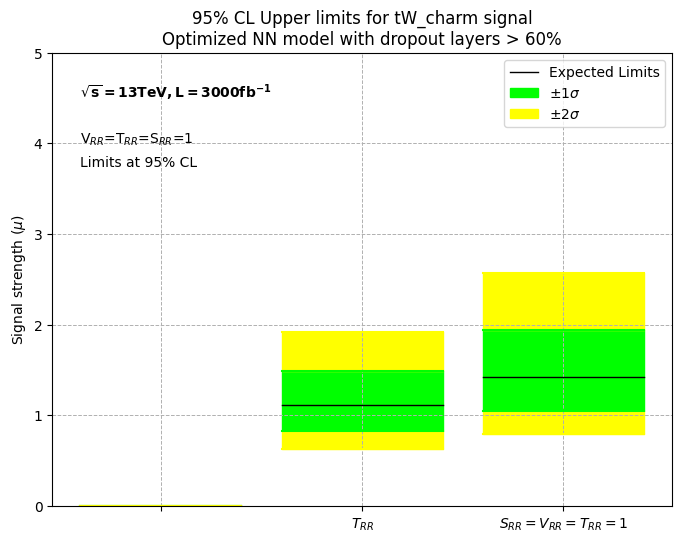

In [64]:
tW_UL_plots('[array(0), array(0), array(0), array(0), array(0)]',
         '[array(0.62800435), array(0.82608494), array(1.11083475), array(1.48738159), array(1.91373767)]',
         '[array(0.79745219), array(1.04959928), array(1.42671393), array(1.93816832), array(2.56997649)]',
         'tW_charm', '', '$T_{RR}$', '$S_{RR}=V_{RR}=T_{RR}=1$', 'Optimized NN model with dropout layers > 60%', [0,5],0.5)

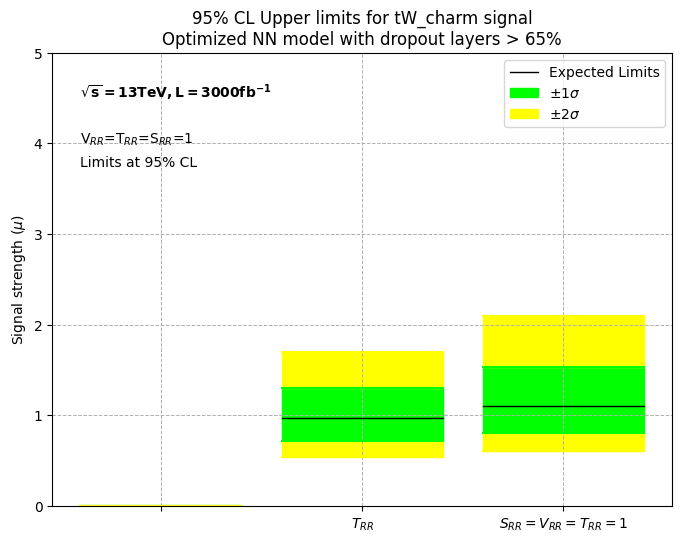

In [65]:
tW_UL_plots('[array(0), array(0), array(0), array(0), array(0)]',
         '[array(0.54421894), array(0.71608558), array(0.96773692), array(1.30400938), array(1.69340687)]',
         '[array(0.61002475), array(0.80263865), array(1.09746258), array(1.52917365), array(2.09644695)]',
         'tW_charm', '', '$T_{RR}$', '$S_{RR}=V_{RR}=T_{RR}=1$', 'Optimized NN model with dropout layers > 65%', [0,5],0.5)

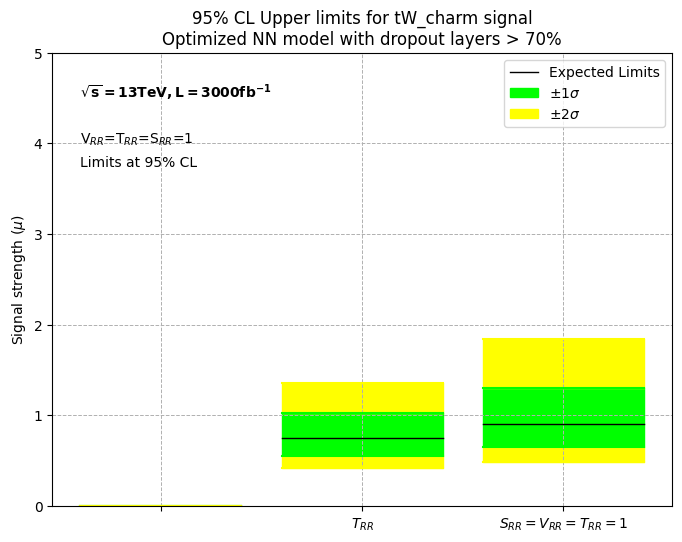

In [66]:
tW_UL_plots('[array(0), array(0), array(0), array(0), array(0)]',
         '[array(0.41514911), array(0.54969689), array(0.74811388), array(1.02557652), array(1.35789144)]',
         '[array(0.48353131), array(0.65437315), array(0.90315559), array(1.30462107), array(1.84519024)]',
         'tW_charm', '', '$T_{RR}$', '$S_{RR}=V_{RR}=T_{RR}=1$', 'Optimized NN model with dropout layers > 70%', [0,5],0.5)

# tW-up signal

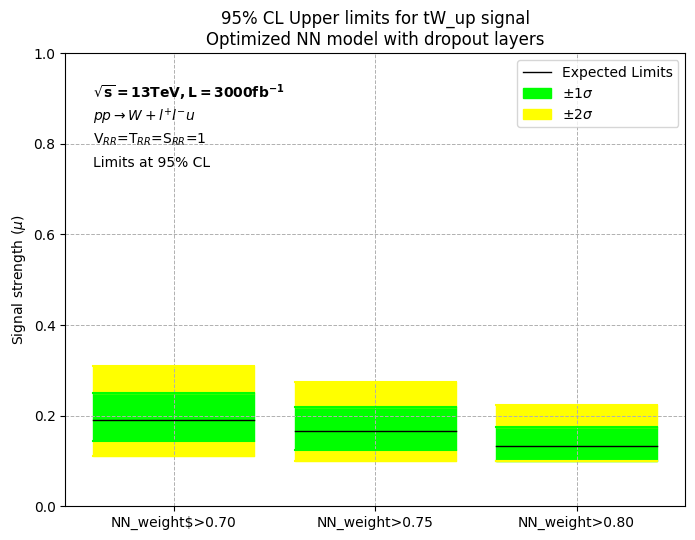

In [379]:
UL_plots('[array(0.11114868), array(0.14393388), array(0.19067895), array(0.24950321), array(0.31030417)]',
         '[array(0.1), array(0.12440445), array(0.16694065), array(0.21901415), array(0.27490902)]',
         '[array(0.1), array(0.1), array(0.13235679), array(0.17459352), array(0.22220566)]',
         'tW_up', 'NN_weight$>0.70', 'NN_weight>0.75', 'NN_weight>0.80', 'Optimized NN model with dropout layers', [0,1])

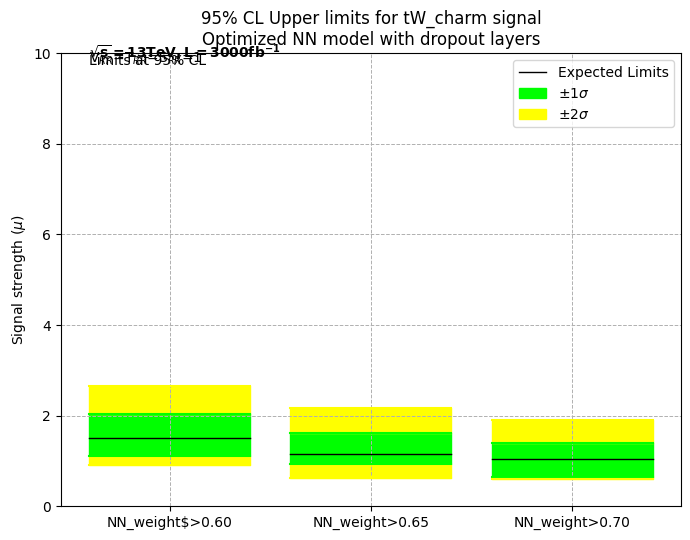

In [380]:
UL_plots('[array(0.90852024), array(1.11292963), array(1.51407632), array(2.02752408), array(2.65232309)]',
         '[array(0.63032381), array(0.92048802), array(1.14359213), array(1.61666895), array(2.16408637)]',
         '[array(0.60717916), array(0.6406899), array(1.03548178), array(1.39028829), array(1.90636366)]',
         'tW_charm', 'NN_weight$>0.60', 'NN_weight>0.65', 'NN_weight>0.70', 'Optimized NN model with dropout layers', [0,10])

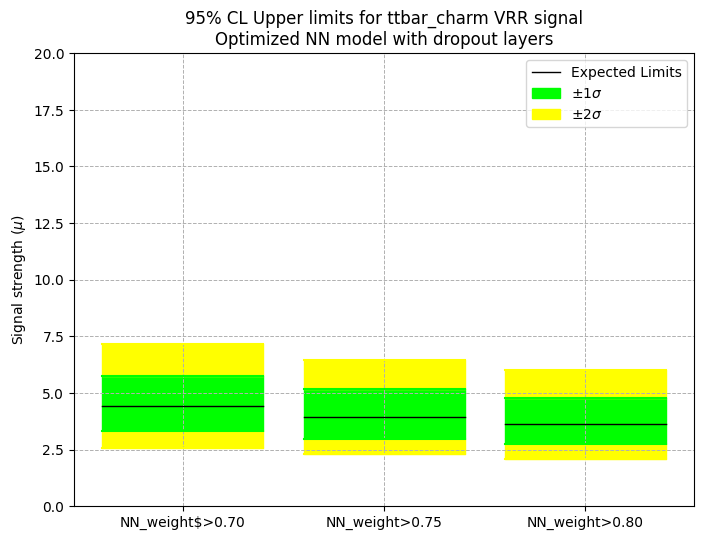

In [238]:
UL_plots('[array(2.55422787), array(3.32620989), array(4.41732855), array(5.76522565), array(7.16500134)]',
         '[array(2.2816063), array(2.97391385), array(3.94654435), array(5.16698866), array(6.44748672)]',
         '[array(2.09669706), array(2.73480403), array(3.64589365), array(4.78655079), array(6.00283274)]',
         'ttbar_charm VRR', 'NN_weight$>0.70', 'NN_weight>0.75', 'NN_weight>0.80', 'Optimized NN model with dropout layers', [0,20])

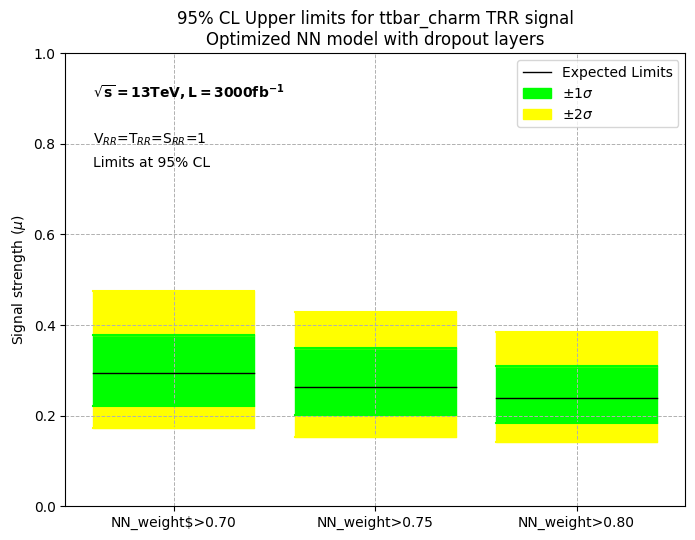

In [381]:
UL_plots('[array(0.17255878), array(0.22075815), array(0.29444444), array(0.37774075), array(0.4749654)]',
         '[array(0.15305498), array(0.20165954), array(0.2634241), array(0.34883998), array(0.42948169)]',
         '[array(0.14214937), array(0.18253698), array(0.23958449), array(0.31036259), array(0.38514362)]',
         'ttbar_charm TRR', 'NN_weight$>0.70', 'NN_weight>0.75', 'NN_weight>0.80', 'Optimized NN model with dropout layers', [0,1])